<a href="https://colab.research.google.com/github/Alex-Ukraine/ml-selfedu/blob/main/dropout.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dropout - метод борьбы с переобучением

Переобучение - это увеличение расхождения в точности выходных значений, критериев качества для обучающей выборки и выборки валидации.

Рекомендация 1: если наблюдается расхождение в точности выходных значений между обучающей и проверочной выборками, то процесс обучения следует остановить и уменьшить число нейронов.

рекомендация 2: если наблюдается переобучение и сокращение числа нейронов недопустимо (по тем или иным причинам), то следует попробовать метод Dropout. p=0,5 или 0,4 или 0,3

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist # 60 000 изображений в обучающей выборке и 10 000 в тестовой
from tensorflow import keras
from tensorflow.keras.layers import Dense, Flatten, Dropout
%matplotlib inline

Загрузка обучающей и тестовой выборок

* x_train - изображения цыфр обучающей выборки;
* y_train - вектор соответствуюющих значений цифр (например, если на i-м изображении нарисована 5, то y_train[i]=5);
* x_test - изображения цифр тестовой выборки;
* y_test - вектор соответствующих значений цифр для тестовой выборки.

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data() # загружаем данные в коллекции

11493376/11490434 [==============================] - 0s 0us/step


In [3]:
# стандартизация входных данных
x_train = x_train / 255
x_test = x_test / 255

Преобразование входных данных значений в векторы по категориям

In [4]:
y_train_cat = keras.utils.to_categorical(y_train, 10)
y_test_cat = keras.utils.to_categorical(y_test, 10)

In [5]:
limit = 5000
x_train_data = x_train[:limit]
y_train_data = y_train_cat[:limit]

x_valid = x_train[limit:limit*2]
y_valid = y_train_cat[limit:limit*2]

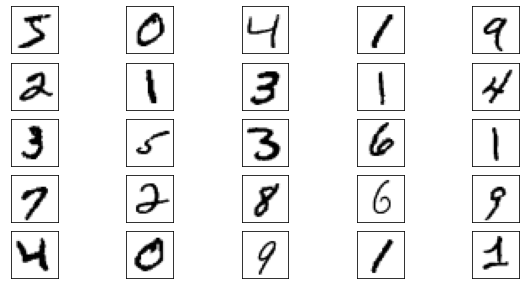

In [6]:
# отображение первых 25 изображенийиз обучающей выборки
plt.figure(figsize=(10,5))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[i], cmap=plt.cm.binary)

plt.show()

Формирование модели НС и вывод её структуры в консоль

In [17]:
model = keras.Sequential([
    Flatten(input_shape=(28, 28, 1)),
    Dense(300, activation='relu'),
    Dropout(0.8),
    Dense(10, activation='softmax')
])

print(model.summary()) # вывод структуры НС в консоль

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 300)               235500    
_________________________________________________________________
dropout_1 (Dropout)          (None, 300)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 10)                3010      
Total params: 238,510
Trainable params: 238,510
Non-trainable params: 0
_________________________________________________________________
None


Компиляция НС с оптимизацией по Adam и критерием - категориальная кросс-энтропия

In [18]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy', # любимчик публики задачи классификации
              metrics=['accuracy'])

Запуск процесса обучения: 80% - обучающая выборка, 20% - выборка валидации

In [19]:
# validation_split - разбиение на обучающую выборку и проверочную
his = model.fit(x_train_data, y_train_data, batch_size=32, epochs=50, validation_data=(x_valid, y_valid)) 

Epoch 1/50
157/157 [==============================] - 1s 5ms/step - loss: 1.1337 - accuracy: 0.6316 - val_loss: 0.4878 - val_accuracy: 0.8750
Epoch 2/50
157/157 [==============================] - 1s 4ms/step - loss: 0.5912 - accuracy: 0.8214 - val_loss: 0.3698 - val_accuracy: 0.8962
Epoch 3/50
157/157 [==============================] - 1s 4ms/step - loss: 0.4895 - accuracy: 0.8542 - val_loss: 0.3268 - val_accuracy: 0.9096
Epoch 4/50
157/157 [==============================] - 1s 4ms/step - loss: 0.4241 - accuracy: 0.8700 - val_loss: 0.3021 - val_accuracy: 0.9140
Epoch 5/50
157/157 [==============================] - 1s 4ms/step - loss: 0.3899 - accuracy: 0.8782 - val_loss: 0.2897 - val_accuracy: 0.9140
Epoch 6/50
157/157 [==============================] - 1s 4ms/step - loss: 0.3445 - accuracy: 0.8938 - val_loss: 0.2685 - val_accuracy: 0.9182
Epoch 7/50
157/157 [==============================] - 1s 4ms/step - loss: 0.3332 - accuracy: 0.8994 - val_loss: 0.2588 - val_accuracy: 0.9210
Epoch 

получим loss и accuracy

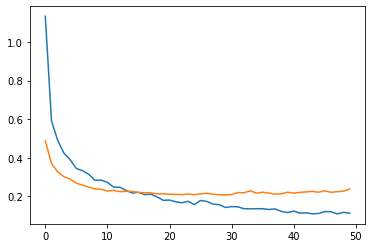

In [20]:
plt.plot(his.history['loss'])
plt.plot(his.history['val_loss'])
plt.show()

In [ ]:
model.evaluate(x_test, y_test_cat)

Проверка распознавания цифр:

In [ ]:
n = 5
x = np.expand_dims(x_test[n], axis=0)
res = model.predict(x) # x - тензор, поэтому добавили одну размерность выше
print(res)
print(f"Распознанная цифра: {np.argmax(res)}") # индекс максимального значения

plt.imshow(x_test[n], cmap=plt.cm.binary)
plt.show()

Распознавание всей тестовой выборки:

In [ ]:
pred = model.predict(x_test)
pred = np.argmax(pred, axis=1)

print(pred.shape)

print(pred[:30])
print(y_test[:30])

Выделение неверных вариантов:

In [ ]:
mask = pred ==y_test
print(mask[:10])

x_false = x_test[~mask] # ~ означает отрицать, поменять значение на противоположное
p_false = pred[~mask]

print(x_false.shape)

Вывод первых 5 неверных результатов

In [ ]:
for i in range(5):
    print("Значение сети: "+str(p_false[i]))
    plt.imshow(x_false[i], cmap=plt.cm.binary)
    plt.show()